In [8]:
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
import numpy as np

conn = None
try:
    conn = sqlite3.connect("../elprotest.db")
    print(sqlite3.version)
except Error as e:
    print(e)

2.6.0


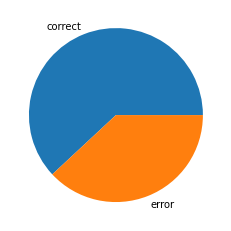

In [9]:
cur = conn.cursor()
cur.execute('SELECT count(a.id) as error_free '
            'from compilations a where a.success=1')

rows = cur.fetchall()

values = [rows[0][0]]
cur.execute('SELECT count(a.id) as error_free '
            'from compilations a where a.success=0')
rows = cur.fetchall()
values.append(rows[0][0])
rows = cur.fetchall()
labels =["correct", "error"]

plt.pie(values, labels=labels)
# plt.xlabel("Test result")
# plt.ylabel("Number of examinations")
plt.savefig("../images/correct_error.png", dpi=300, bbox_inches = "tight")
plt.show()



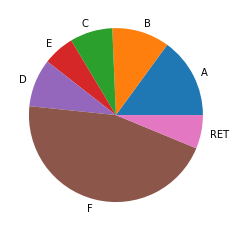

In [10]:
cur = conn.cursor()
cur.execute('SELECT results.grade, count(*) FROM results, grade_sort where grade_sort.grade = results.grade'
            ' and results.grade!="ASS" group by results.grade order by grade_sort.id')

rows = cur.fetchall()
grademap = {"OTT": "A", "DIT": "B", "BUO": "C", "SUF": "D", "DIS":"E",
            "INSUF":"F", "RIT":"RET"}
labels = []
values = []

for row in rows:
       labels.append(grademap[row[0]])
       values.append(row[1])
plt.pie(values, labels=labels)
# plt.xlabel("Test result")
# plt.ylabel("Number of examinations")
plt.savefig("../images/test_results.png", dpi=300, bbox_inches = "tight")
plt.show()

No handles with labels found to put in legend.


20170519 38 0.21052631578947367
20170616 30 0.16666666666666666
20170717 36 0.3888888888888889
20170920 33 0.30303030303030304
20171023 29 0.3793103448275862
20171204 20 0.55
20180124 44 0.36363636363636365
20180214 62 0.5
20180321 66 0.5909090909090909
20180613 19 0.5789473684210527
20180713 10 0.1
20180725 29 0.41379310344827586
20180905 6 0.16666666666666666
20181011 9 0.3333333333333333
20181108 11 0.5454545454545454
20181212 18 0.6111111111111112
20190109 47 0.2127659574468085
20190123 108 0.5462962962962963
20190206 69 0.37681159420289856
20190311 28 0.6785714285714286
20190520 19 0.3157894736842105
20190617 9 0.3333333333333333
20190709 26 0.5769230769230769
20190913 10 0.6
20191015 11 0.2727272727272727
20191119 4 0.5
20200109 8 0.125
20200129 132 0.5454545454545454
20200205 78 0.5897435897435898
min: 0.1 on 20180713 students 10
max: 0.6785714285714286 on 20190311 students 28
average: 0.40950657484713165


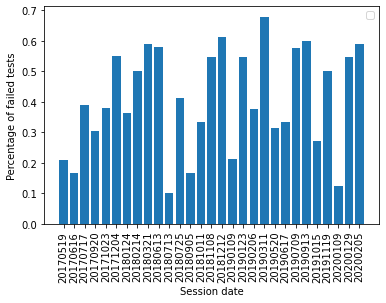

In [14]:
cur.execute('SELECT session, count(*) FROM results where grade="INSUF" group by results.session order by session')

rows = cur.fetchall()

labels = []
values = []

for row in rows:
       labels.append(row[0])
       values.append(row[1])

cur.execute('SELECT count(*) FROM '
            'results where grade!="ASS" '
            'group by results.session order by session')
rows = cur.fetchall()

denom = []
for row in rows:
       denom.append(int(row[0]))
plt.figure()
i_min=0
i_max=0
for i in range(len(values)):
    values[i] /=denom[i]
    if values[i]<values[i_min]:
        i_min = i
    if values[i] > values[i_max]:
        i_max = i
    print(labels[i],denom[i],values[i])

plt.bar(labels,values)
plt.legend()
plt.xticks(rotation=90)
plt.ylabel("Percentage of failed tests")
plt.xlabel("Session date")
plt.savefig("../images/rejected_perc.png",dpi=300, bbox_inches = "tight")
plt.show()
print("min:", values[i_min], "on",labels[i_min],"students", denom[i_min])
print("max:", values[i_max], "on",labels[i_max], "students", denom[i_max])
print("average:",np.average(values))

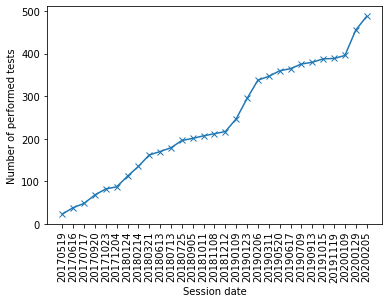

In [12]:
cur.execute('SELECT session, count(*) FROM results where grade!="INSUF" and grade!="ASS" and grade!="RIT" group by results.session order by session')

rows = cur.fetchall()

labels = []
values = []

tot = 0
for row in rows:
       labels.append(row[0])
       tot += row[1]
       values.append(tot)

cur.execute('SELECT count(*) FROM results where grade!="ASS" group by results.session order by session')
rows = cur.fetchall()
'''
denom = []
for row in rows:
       denom.append(int(row[0]))



for i in range(len(values)):
    values[i] /=denom[i]
'''
plt.figure()
plt.plot(labels,values,'-x')
#plt.legend()
plt.xticks(rotation=90)
plt.ylabel("Number of performed tests")
plt.xlabel("Session date")
plt.savefig("../images/performed_tests.png", dpi=300, bbox_inches = "tight")
plt.show()

[39, 34, 21, 16, 20, 131, 13]
[59, 38, 27, 20, 28, 149, 10]
[14.233576642335766, 12.408759124087592, 7.664233576642336, 5.839416058394161, 7.299270072992701, 47.81021897810219, 4.744525547445256]
[17.82477341389728, 11.48036253776435, 8.157099697885196, 6.042296072507553, 8.459214501510575, 45.01510574018127, 3.0211480362537766]


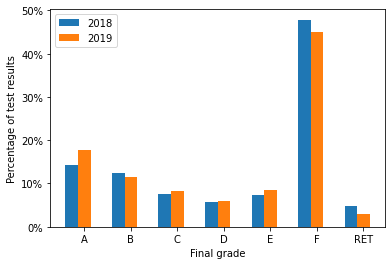

In [15]:
cur.execute('SELECT results.grade, count(*) '
            'FROM results, grade_sort '
            'where results."session" like "2018%" and grade_sort.grade = results.grade '
            'and results.grade!="ASS"  group by results.grade order by grade_sort.id')


rows = cur.fetchall()

labels = []
values2018 = []

for row in rows:
       labels.append(row[0])
       values2018.append(row[1])

cur.execute('SELECT results.grade, count(*) '
            'FROM results, grade_sort '
            'where results."session" like "2019%" and grade_sort.grade = results.grade '
            'and results.grade!="ASS"  group by results.grade order by grade_sort.id')
rows = cur.fetchall()

values2019 = []
for row in rows:
       values2019.append(int(row[1]))
print(values2018)
print(values2019)
sum_2018 = np.sum(values2018)
sum_2019 = np.sum(values2019)
for i in range(len(values2018)):
    values2018[i] = 100*values2018[i]/sum_2018
for i in range(len(values2019)):
    values2019[i] = 100*values2019[i]/sum_2019
print(values2018)
print(values2019)
ind = np.arange(7)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(ind, values2018,0.27, label="2018")
ax.bar(ind+0.27, values2019,0.27, label="2019")
ax.legend()
# plt.xticks(rotation=90)
ax.set_xticks(ind+0.27)
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'RET'])
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
import matplotlib.ticker as mtick
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

plt.ylabel("Percentage of test results")
plt.xlabel("Final grade")
plt.savefig("../images/grade_percent.png",dpi=300, bbox_inches = "tight")
plt.show()



